## EXAM
##### by Anton Changalidi
### ЧАСТЬ 1.
![](./task_1.png)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_stars = pd.read_csv('pulsar_stars_new.csv')
mip_boards = [(96.921875, 97.4140625),
              (41.8828125, 47.4140625)]
data = data_stars[((data_stars.TARGET == 0) & 
                   (mip_boards[0][0] <= data_stars.MIP) & 
                   (data_stars.MIP <= mip_boards[0][1])) | 
                  ((data_stars.TARGET == 1) & 
                   (mip_boards[1][0] <= data_stars.MIP) & 
                   (data_stars.MIP <= mip_boards[1][1]))]
data.head()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TARGET
98,97.140625,47.770894,0.625218,0.740796,4.193144,26.465261,6.927046,49.628527,0
145,44.867188,45.693334,2.888739,8.810673,176.119565,59.737720,-1.785377,2.940913,1
346,97.234375,46.536357,0.558616,0.384429,2.010033,13.634376,10.022346,132.125623,0
358,42.578125,46.638337,2.841558,7.832819,12.971572,38.498849,3.799728,14.990834,1
445,97.171875,45.656172,0.721308,0.482644,1.557692,12.590775,11.434676,169.923103,0


#### Укажите число строк в полученной выборке.

#### Определите выборочное среднее для столбца `MIP`.


In [3]:
print(f'Укажите число строк в полученной выборке: '
      f'{data.shape[0]}')
print(f'Определите выборочное среднее для столбца MIP: '
      f'{np.round(data.MIP.mean(), 3)}')

Укажите число строк в полученной выборке: 202
Определите выборочное среднее для столбца MIP: 70.795


#### Выполните линейную нормировку всех значений предикторов полученной выборки.

Определите выборочное среднее для столбца `MIP` после нормировки:

In [4]:
y = data.TARGET
X = data.drop('TARGET', axis = 1)
X

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC
98,97.140625,47.770894,0.625218,0.740796,4.193144,26.465261,6.927046,49.628527
145,44.867188,45.693334,2.888739,8.810673,176.119565,59.737720,-1.785377,2.940913
346,97.234375,46.536357,0.558616,0.384429,2.010033,13.634376,10.022346,132.125623
358,42.578125,46.638337,2.841558,7.832819,12.971572,38.498849,3.799728,14.990834
445,97.171875,45.656172,0.721308,0.482644,1.557692,12.590775,11.434676,169.923103
...,...,...,...,...,...,...,...,...
17186,97.148438,37.160145,0.457632,1.767783,2.464883,17.646414,9.645039,104.454324
17243,97.101562,46.205864,0.486238,0.375747,0.418060,8.618880,25.031765,682.519179
17359,97.218750,43.081307,0.473589,0.725725,1.484114,14.872948,12.610224,175.176577
17539,97.242188,53.488572,0.474394,0.124107,2.417224,18.369826,8.632126,82.292908


In [5]:
from sklearn.preprocessing import MinMaxScaler


X = MinMaxScaler().fit_transform(X)

col_names = ['MIP','STDIP','EKIP','SIP','MC','STDC','EKC','SC']
X = pd.DataFrame(X, columns=col_names)
print(f'Определите выборочное среднее для столбца MIP после нормализации: '
      f'{np.round(X.MIP.mean(), 3)}')

Определите выборочное среднее для столбца MIP после нормализации: 0.521


![](./task_1_2.png)
#### Введите вероятность отнесения звезды к классу пульсар:

In [6]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(random_state=2019).fit(X, y.values.ravel())

In [7]:
new_star = [[0.539, 0.162, 0.188, 0.653, 0.796, 0.233, 0.397, 0.065]]
classes = {'пульсар':1, 'не пульсар':0}
answers = LR_model.predict_proba(new_star)[0]

print('Вероятность отнесения звезды к классу пульсар:'
      f'{np.round(answers[classes["пульсар"]], 3)}')
# np.round(LR_model.predict_proba(new_star), 3)

Вероятность отнесения звезды к классу пульсар:0.578


#### Выполните классификацию новой звезды, с помощью метода k-ближайших соседей, используя нормализованные данные выборки.

Введите расстояние от новой звезды до ближайшего соседа, используя евклидову метрику.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3, p=2).fit(X, y)

In [9]:
print('Расстояние от новой звезды до ближайшего соседа, используя евклидову метрику: '
      f'{np.round(KNN_model.kneighbors(new_star)[0][0][0], 3)}')

Расстояние от новой звезды до ближайшего соседа, используя евклидову метрику: 0.894


### ЧАСТЬ 2. Working with MNIST

Используйте метод главных компонент для набора данных `MNIST` (train dataset объема 60000). 

In [10]:
from keras.datasets import mnist
import matplotlib
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Using TensorFlow backend.
/home/toharhymes/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/toharhymes/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/toharhymes/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/toharhymes/anaconda3/lib/python3.7/sit

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

Определите, какое минимальное количество главных компонент  необходимо использовать, чтобы доля объясненной дисперсии превышала `0.82` (была строго больше указанного значения).

In [25]:
threshold = 0.82

pca = PCA(n_components=28*28)
pca.fit(X_train)
variance = np.cumsum(pca.explained_variance_ratio_)

M = np.argmax(variance > threshold) + 1

print(f'Количество главных компонент: {M}')

Количество главных компонент: 49


#### Найдите счеты, отвечающие найденным в предыдущем пункте  главным компонентам: 
`PCA(n_components=M, svd_solver='full')`.

In [26]:
pca = PCA(n_components=M, svd_solver='full')
X_train = pca.fit_transform(X_train)

#### Разделите полученную выборку (после сокращения размерности) случайным образом в отношении 70/30: 
`train_test_split(X_train, y_train, test_size=0.3, random_state=68)`

Введите выборочное среднее нулевой колонки для полученного тренировочного набора:

In [27]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=68)
print(f'Выборочное среднее нулевой колонки для полученного тренировочного набора:'
      f'{np.round(np.mean(X_train[:, 0]), 2)}')

Выборочное среднее нулевой колонки для полученного тренировочного набора:1.71


#### One-vs-All (Random Forest)

Используя метод многоклассовой классификации One-vs-All `OneVsRestClassifier()`, обучите алгоритм случайного леса `RandomForestClassifier()` с параметрами `criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=68`. 
Выполните оценку с помощью тестовых данных.

Введите количество верно классифицированных объектов класса 3 для тестовых данных:

In [28]:
RF_clf = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=68)
OA_RF_clf = OneVsRestClassifier(RF_clf)

OA_RF_clf.fit(X_train, y_train)
y_pred = OA_RF_clf.predict(X_test)

print(f'Количество верно классифицированных объектов класса 3: {(y_pred[y_test == 3] == 3).sum()}') 

Количество верно классифицированных объектов класса 3: 1591


#### One-vs-All (Logistic Regression)

Используя метод многоклассовой классификации One-vs-All `OneVsRestClassifier()`, обучите алгоритм логистической регрессии `LogisticRegression(solver='lbfgs', random_state=68)`. Остальные параметры оставьте по умолчанию. Выполните оценку с помощью тестовых данных.

Введите количество верно классифицированных объектов класса 8 для тестовых данных:

In [30]:
LR_clf = LogisticRegression(solver='lbfgs', random_state=68)
OA_LR_clf = OneVsRestClassifier(LR_clf)

OA_LR_clf.fit(X_train, y_train)
y_pred = OA_LR_clf.predict(X_test)

print(f'Количество верно классифицированных объектов класса 8: {(y_pred[y_test == 8] == 8).sum()}') 

/home/toharhymes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Количество верно классифицированных объектов класса 8: 1495


#### One-vs-All (DecisionTreeClassifier)
Используя метод многоклассовой классификации One-vs-All `OneVsRestClassifier()`, обучите дерево принятия решений `DecisionTreeClassifier()` с параметрами `criterion='gini', min_samples_leaf=10, max_depth=20, random_state=68`. Выполните оценку с помощью тестовых данных.

Введите количество верно классифицированных объектов класса 5 для тестовых данных:

In [31]:
DT_clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, random_state=68)
OA_DT_clf = OneVsRestClassifier(DT_clf)

OA_DT_clf.fit(X_train, y_train)
y_pred = OA_DT_clf.predict(X_test)

print(f'Количество верно классифицированных объектов класса 5: {(y_pred[y_test == 5] == 5).sum()}') 

Количество верно классифицированных объектов класса 5: 1198


#### Примените полученное ранее преобразование метода главных компонент к новым данным (идентификаторы строк соответствуют файлам изображений).
`./pred_for_task.csv`

In [32]:
data = pd.read_csv('./pred_for_task.csv', index_col='FileName')

#### Выполните предсказание для указанных изображений цифр с помощью обученных алгоритмов.

In [33]:
def get_row(name):
    x = data.loc[name, :].drop('Label')
    y = data.loc[name, :].Label
    return x, y


def predict_digit(x, y, clf, name):
    plt.imshow(x.to_numpy().reshape([28,28]), cmap='Greys_r')
    plt.show()
    x = pca.transform([x])
    print(f'Вероятность отнесения изображения file18 к классу {y} алгоритмом {name}:\n'
          f'{np.round(clf.predict_proba(x)[0][y], 3)}')

Введите вероятность отнесения изображения file18 к назначенному классу алгоритмом случайного леса.

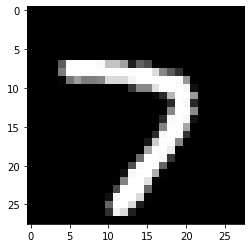

Вероятность отнесения изображения file18 к классу 7 алгоритмом  random forest:
0.88


In [34]:
x, y = get_row('file18')
predict_digit(x, y, OA_RF_clf, ' random forest')

Введите вероятность отнесения изображения file15 к назначенному классу алгоритмом логистической регрессией.

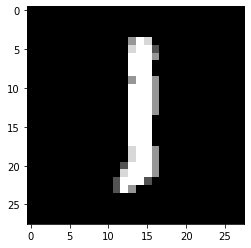

Вероятность отнесения изображения file18 к классу 1 алгоритмом logistic regression:
0.902


In [35]:
x, y = get_row('file15')
predict_digit(x, y, OA_LR_clf, 'logistic regression')

Введите вероятность отнесения изображения file19 к назначенному классу деревом принятия решений.

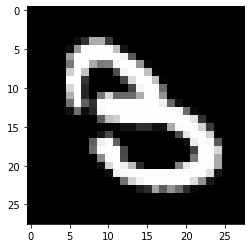

Вероятность отнесения изображения file18 к классу 3 алгоритмом decicion tree:
0.674


In [36]:
x, y = get_row('file19')
predict_digit(x, y, OA_DT_clf, 'decicion tree')